## Importing modules and dataset

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("15389_dataset.TXT", delimiter = '\t')

In [3]:
data.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,ORDER_STATUS,CUSTOMER_NUMBER
0,1,DEC1,1,1,0.0,NaN,DEC1,20110404,85332,ZZC0,8421000,1793.95,20110404,EUR,NaN,8421000
1,2,DEC1,1,1,0.0,NaN,DEC1,20110404,85501,ZZC0,37,184.11,20110404,EUR,NaN,37
2,3,DEC1,1,1,0.0,NaN,DEC1,20110404,85942,ZZC0,101,1300.3,20110404,EUR,NaN,101
3,4,DEC1,1,1,0.0,NaN,DEC1,20110404,85810,ZZC0,4141000,569.09,20110404,EUR,NaN,4141000
4,5,DEC1,1,1,0.0,NaN,DEC1,20110404,85457,ZZC0,829,33.8,20110411,EUR,NaN,829


In [4]:
data.shape

(460737, 16)

### Dropping few columns based on null values and number of unique values

In [5]:
data.isna().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE        370379
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA         13944
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
ORDER_STATUS               434933
CUSTOMER_NUMBER                 0
dtype: int64

In [6]:
data.drop(columns=['PURCHASE_ORDER_TYPE', 'ORDER_STATUS'], inplace=True)

In [7]:
data.nunique()

CUSTOMER_ORDER_ID          460737
SALES_ORG                       4
DISTRIBUTION_CHANNEL            1
DIVISION                        1
RELEASED_CREDIT_VALUE       44409
COMPANY_CODE                    4
ORDER_CREATION_DATE          3350
ORDER_CREATION_TIME         63191
CREDIT_CONTROL_AREA             2
SOLD_TO_PARTY                3114
ORDER_AMOUNT               201569
REQUESTED_DELIVERY_DATE      3406
ORDER_CURRENCY                  3
CUSTOMER_NUMBER              3122
dtype: int64

In [8]:
data.drop(columns=['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION', 'CREDIT_CONTROL_AREA'], inplace=True)

In [9]:
data.nunique()

RELEASED_CREDIT_VALUE       44409
COMPANY_CODE                    4
ORDER_CREATION_DATE          3350
ORDER_CREATION_TIME         63191
SOLD_TO_PARTY                3114
ORDER_AMOUNT               201569
REQUESTED_DELIVERY_DATE      3406
ORDER_CURRENCY                  3
CUSTOMER_NUMBER              3122
dtype: int64

### Data types conversion

In [10]:
data.dtypes

RELEASED_CREDIT_VALUE      object
COMPANY_CODE               object
ORDER_CREATION_DATE         int64
ORDER_CREATION_TIME         int64
SOLD_TO_PARTY              object
ORDER_AMOUNT               object
REQUESTED_DELIVERY_DATE     int64
ORDER_CURRENCY             object
CUSTOMER_NUMBER            object
dtype: object

In [11]:
data=data.loc[data['REQUESTED_DELIVERY_DATE']!=0]

In [12]:
data['REQUESTED_DELIVERY_DATE']=data['REQUESTED_DELIVERY_DATE'].apply(lambda x:str(x).replace('9201', '2019'))

In [13]:
data['ORDER_CREATION_DATE'] = pd.to_datetime(data['ORDER_CREATION_DATE'], format = "%Y%m%d" )
data['REQUESTED_DELIVERY_DATE']=pd.to_datetime(data['REQUESTED_DELIVERY_DATE'], format = "%Y%m%d")

In [14]:
data['ORDER_AMOUNT'] = [str(i).replace("-", "") for i in data['ORDER_AMOUNT']]
data['ORDER_AMOUNT'] = data['ORDER_AMOUNT'].astype(float)

In [15]:
data.dtypes

RELEASED_CREDIT_VALUE              object
COMPANY_CODE                       object
ORDER_CREATION_DATE        datetime64[ns]
ORDER_CREATION_TIME                 int64
SOLD_TO_PARTY                      object
ORDER_AMOUNT                      float64
REQUESTED_DELIVERY_DATE    datetime64[ns]
ORDER_CURRENCY                     object
CUSTOMER_NUMBER                    object
dtype: object

In [16]:
data.head()

,RELEASED_CREDIT_VALUE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER
0,0.0,DEC1,2011-04-04,85332,8421000,1793.95,2011-04-04,EUR,8421000
1,0.0,DEC1,2011-04-04,85501,37,184.11,2011-04-04,EUR,37
2,0.0,DEC1,2011-04-04,85942,101,1300.30,2011-04-04,EUR,101
3,0.0,DEC1,2011-04-04,85810,4141000,569.09,2011-04-04,EUR,4141000
4,0.0,DEC1,2011-04-04,85457,829,33.80,2011-04-11,EUR,829


### Converting the invoice currency to a global currency (USD)

In [17]:
data['CUSTOMER'] = data['COMPANY_CODE'].astype(str) + data['CUSTOMER_NUMBER'].astype(str)

### Outliers removal

In [18]:
def removeOutlier(group):
    mean, std = np.mean(group["ORDER_AMOUNT"]), np.std(group["ORDER_AMOUNT"])
    group["ORDER_AMOUNT"] = np.where(group["ORDER_AMOUNT"]>mean+3*std, mean, group["ORDER_AMOUNT"])
    return group

print(data["ORDER_AMOUNT"].sum())
print(data["ORDER_AMOUNT"].max())
print(data["ORDER_AMOUNT"].min())
data = data.groupby("CUSTOMER").apply(removeOutlier)
print(data["ORDER_AMOUNT"].sum())
print(data["ORDER_AMOUNT"].max())
print(data["ORDER_AMOUNT"].min())

1475477563.4999998
21113350.0
0.0
1130305476.0872662
1800169.62
0.0


In [19]:
data.ORDER_CURRENCY.value_counts()

EUR    441989
GBP     10429
USD      5205
Name: ORDER_CURRENCY, dtype: int64

In [20]:
def func(ORDER_AMOUNT, ORDER_CURRENCY):
    if ORDER_CURRENCY=='EUR':
        return ORDER_AMOUNT * 1.18
    elif ORDER_CURRENCY=='GBP':
        return ORDER_AMOUNT * 1.38
    else:
        return ORDER_AMOUNT

In [21]:
data['CONVERTED_ORDER_CURRENCY']=data.apply(lambda x: func(x['ORDER_AMOUNT'], x['ORDER_CURRENCY']), axis=1)

In [22]:
data.drop(columns=['ORDER_AMOUNT', 'ORDER_CURRENCY'], inplace=True)

In [23]:
data.head()

,RELEASED_CREDIT_VALUE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CUSTOMER_NUMBER,CUSTOMER,CONVERTED_ORDER_CURRENCY
0,0.0,DEC1,2011-04-04,85332,8421000,2011-04-04,8421000,DEC18421000,2116.8610
1,0.0,DEC1,2011-04-04,85501,37,2011-04-04,37,DEC137,217.2498
2,0.0,DEC1,2011-04-04,85942,101,2011-04-04,101,DEC1101,1534.3540
3,0.0,DEC1,2011-04-04,85810,4141000,2011-04-04,4141000,DEC14141000,671.5262
4,0.0,DEC1,2011-04-04,85457,829,2011-04-11,829,DEC1829,39.8840


### Data Sanity Check

In [24]:
print('Data Size before sanity check ',data.shape)

data = data[(data['CONVERTED_ORDER_CURRENCY']>=0) & (data['CONVERTED_ORDER_CURRENCY']<700000)]

print('After sanity check size is ',data.shape)

Data Size before sanity check  (457623, 9)
After sanity check size is  (457613, 9)


In [25]:
print('Data Size before sanity check ',data.shape)

data = data[data['REQUESTED_DELIVERY_DATE'] >= data['ORDER_CREATION_DATE']]

data=data[data.CONVERTED_ORDER_CURRENCY > 0]

print('After sanity check size is ',data.shape)

Data Size before sanity check  (457613, 9)
After sanity check size is  (424061, 9)


In [26]:
data.REQUESTED_DELIVERY_DATE.dt.year.value_counts()

2021    46820
2017    43717
2020    41793
2016    40828
2018    39173
2015    38245
2014    37531
2013    36567
2019    35962
2012    35641
2011    27757
2022       20
2023        2
2202        1
2201        1
2024        1
2025        1
2026        1
Name: REQUESTED_DELIVERY_DATE, dtype: int64

In [27]:
data=data.loc[data.REQUESTED_DELIVERY_DATE.dt.year>=2011]
data=data.loc[data.REQUESTED_DELIVERY_DATE.dt.year<=2021]

In [28]:
data.REQUESTED_DELIVERY_DATE.dt.year.value_counts()

2021    46820
2017    43717
2020    41793
2016    40828
2018    39173
2015    38245
2014    37531
2013    36567
2019    35962
2012    35641
2011    27757
Name: REQUESTED_DELIVERY_DATE, dtype: int64

In [29]:
data=data.loc[data.ORDER_CREATION_DATE>='2011-06-01']
data=data.loc[data.ORDER_CREATION_DATE<'2021-07-01']

### Statistical Analysis

In [30]:
q = data["CONVERTED_ORDER_CURRENCY"].quantile(0.99)
print(q)
print(data[data["CONVERTED_ORDER_CURRENCY"]<q].shape)
print(data.shape)
print((len(data)-len(data[data["CONVERTED_ORDER_CURRENCY"]<q]))*100/len(data),"%")
print(len(data[data["CONVERTED_ORDER_CURRENCY"]>=q]["CONVERTED_ORDER_CURRENCY"].unique()))
print(data[data["CONVERTED_ORDER_CURRENCY"]>=q]["CONVERTED_ORDER_CURRENCY"].sum())
print(data[data["CONVERTED_ORDER_CURRENCY"]<q]["CONVERTED_ORDER_CURRENCY"].sum())

33155.60224000007
(403559, 9)
(407636, 9)
1.000157002816238 %
3669
266700817.84284404
987006420.8850154


In [31]:
data['CONVERTED_ORDER_CURRENCY'].sum()

1253707238.7278593

### Outliers removal

In [32]:
def removeOutlier(group):
    mean, std = np.mean(group["CONVERTED_ORDER_CURRENCY"]), np.std(group["CONVERTED_ORDER_CURRENCY"])
    group["CONVERTED_ORDER_CURRENCY"] = np.where(group["CONVERTED_ORDER_CURRENCY"]>mean+3*std, mean, group["CONVERTED_ORDER_CURRENCY"])
    return group

print(data["CONVERTED_ORDER_CURRENCY"].sum())
print(data["CONVERTED_ORDER_CURRENCY"].max())
print(data["CONVERTED_ORDER_CURRENCY"].min())
data = data.groupby("CUSTOMER").apply(removeOutlier)
print(data["CONVERTED_ORDER_CURRENCY"].sum())
print(data["CONVERTED_ORDER_CURRENCY"].max())
print(data["CONVERTED_ORDER_CURRENCY"].min())

1253707238.7278593
693811.09
0.00046825396825396823
1100729162.731617
548397.9199999999
0.00046825396825396823


### EDA

In [33]:
data.head()

,RELEASED_CREDIT_VALUE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CUSTOMER_NUMBER,CUSTOMER,CONVERTED_ORDER_CURRENCY
6690,0.0,DEC1,2011-06-01,13803,5750,2011-06-01,5750,DEC15750,561.8452
6691,0.0,DEC1,2011-06-01,14550,966,2011-06-09,966,DEC1966,65.1360
6692,0.0,DEC1,2011-06-01,14825,41557000,2011-06-01,41557000,DEC141557000,2649.8434
6693,0.0,DEC1,2011-06-01,15224,41557000,2011-06-01,41557000,DEC141557000,2004.4660
6694,0.0,DEC1,2011-06-01,15610,41557000,2011-06-01,41557000,DEC141557000,710.5488


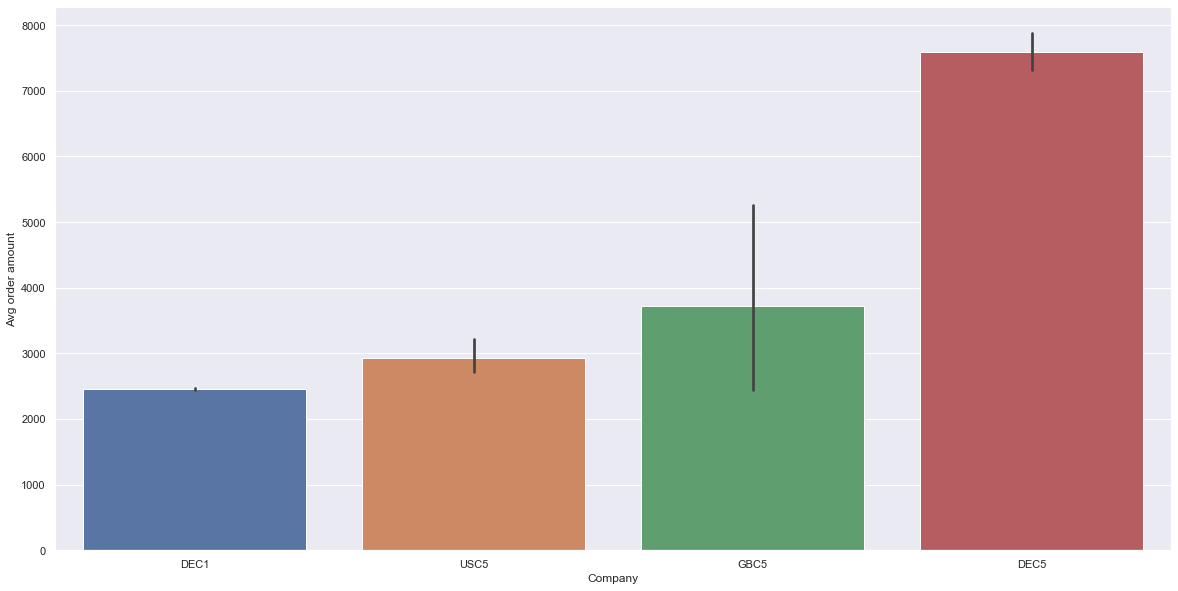

In [34]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=data, x="COMPANY_CODE", y="CONVERTED_ORDER_CURRENCY")
plt.xlabel('Company')
plt.ylabel('Avg order amount')
plt.show()

<AxesSubplot:xlabel='ORDER_CREATION_DATE'>

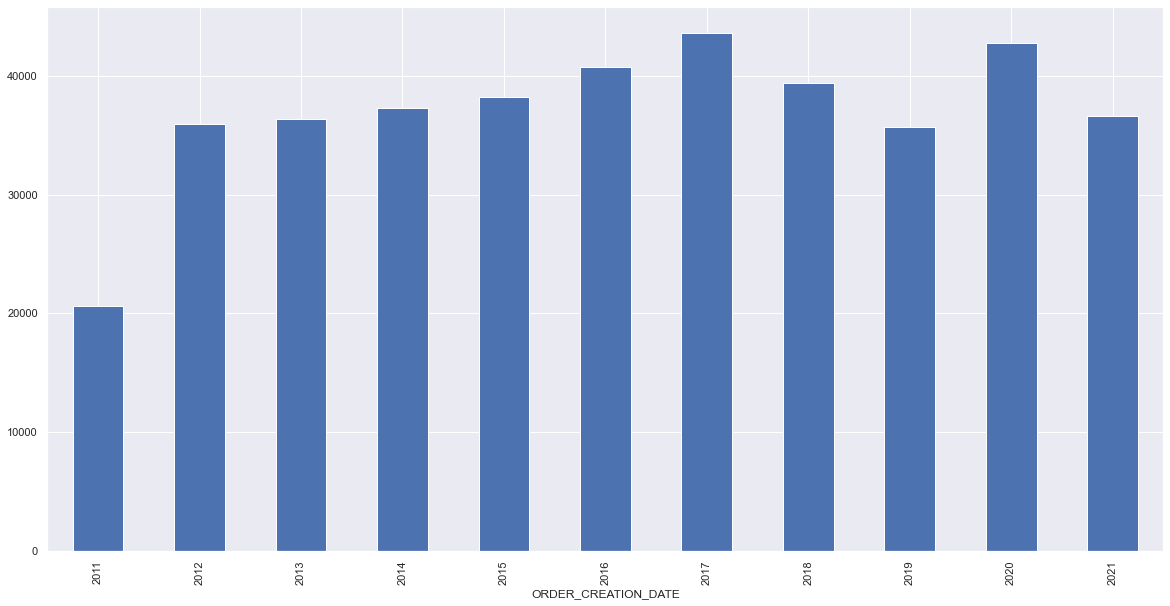

In [35]:
data.groupby(data["ORDER_CREATION_DATE"].dt.year)["CONVERTED_ORDER_CURRENCY"].count().plot.bar()

<AxesSubplot:xlabel='ORDER_CREATION_DATE', ylabel='count'>

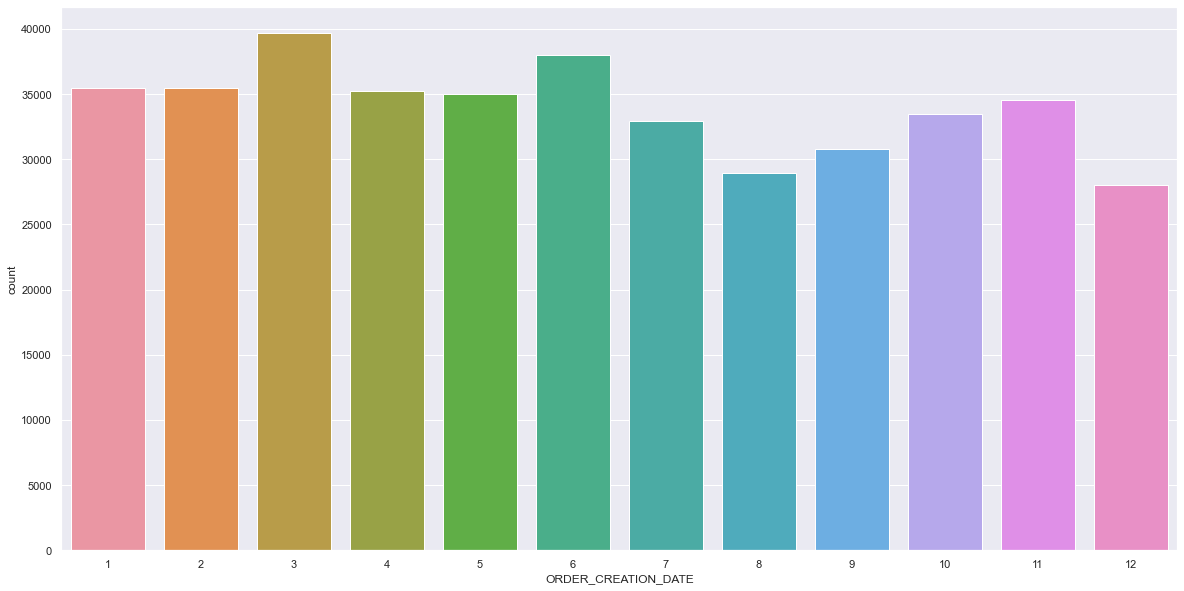

In [36]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.countplot(data=data, x=data.ORDER_CREATION_DATE.dt.month)

<AxesSubplot:xlabel='REQUESTED_DELIVERY_DATE', ylabel='count'>

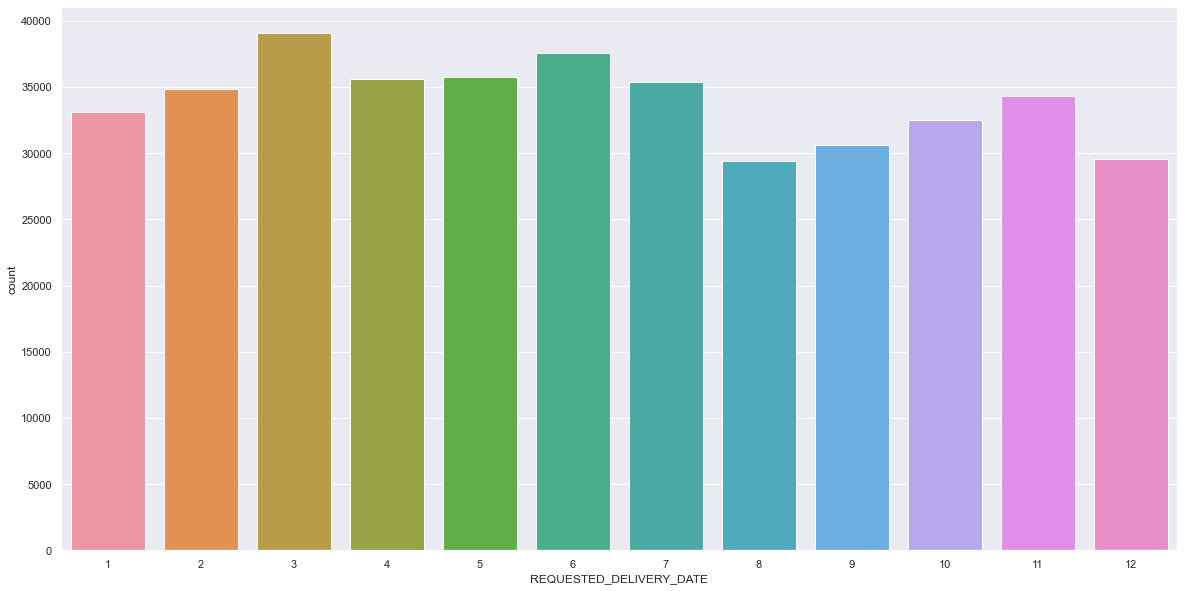

In [37]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.countplot(data=data, x=data.REQUESTED_DELIVERY_DATE.dt.month)

<AxesSubplot:xlabel='ORDER_CREATION_DATE'>

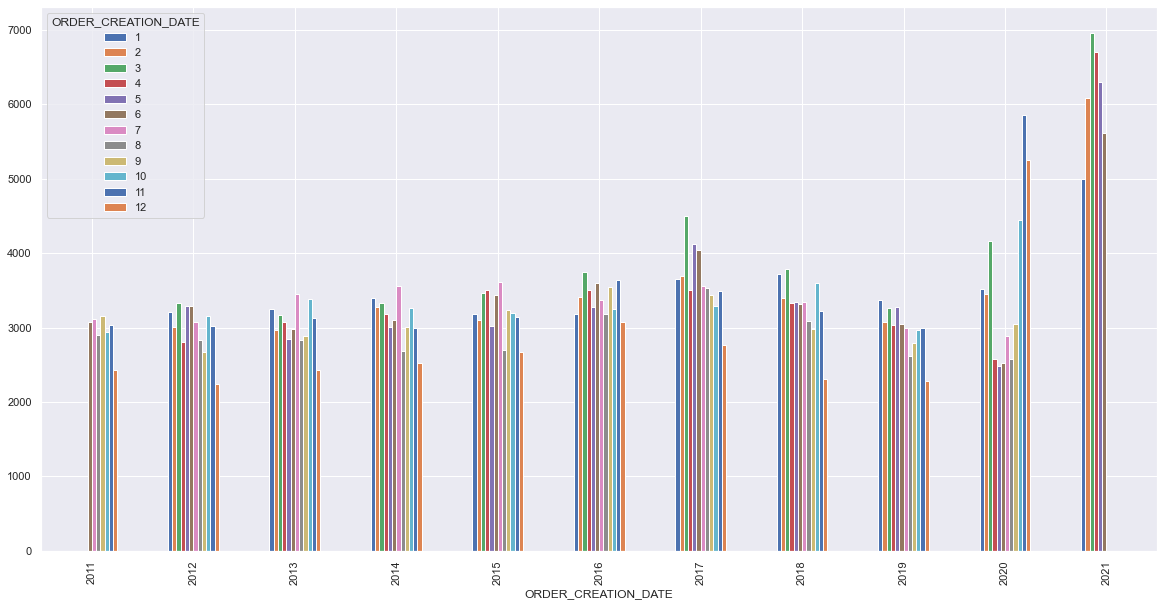

In [38]:
data.groupby([data["ORDER_CREATION_DATE"].dt.year, data["ORDER_CREATION_DATE"].dt.month])["CONVERTED_ORDER_CURRENCY"].count().unstack().plot.bar()

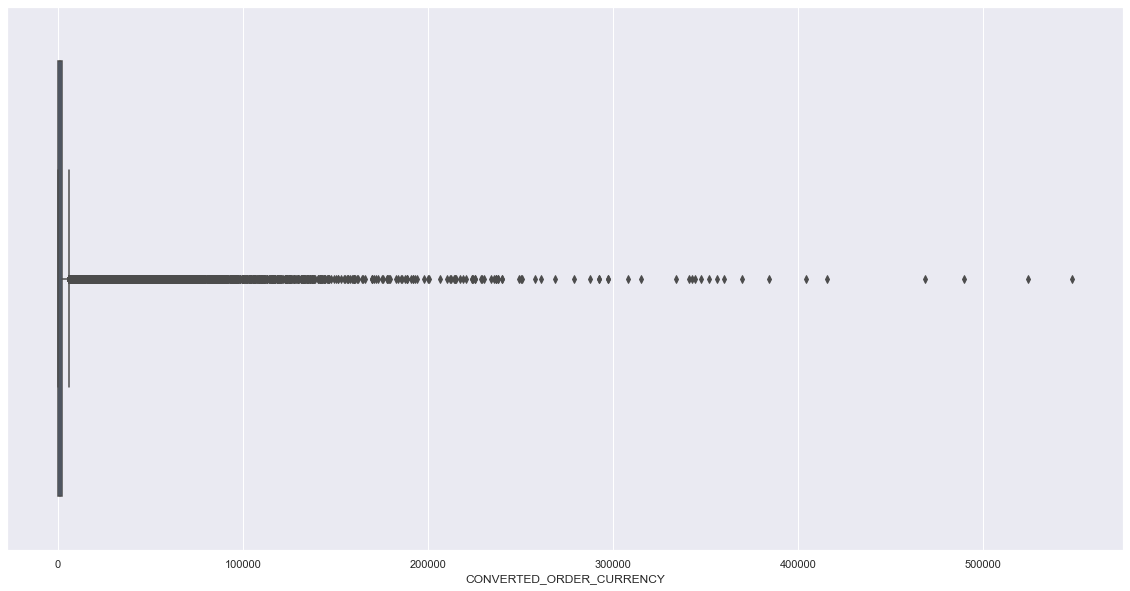

In [39]:
ax=sns.boxplot(x=data['CONVERTED_ORDER_CURRENCY'])

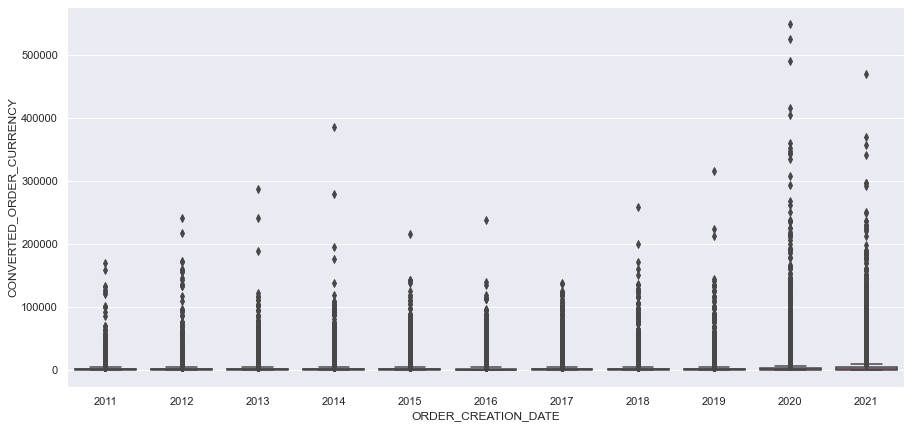

In [40]:
plt.figure(figsize=(15,7))
ax=sns.boxplot(x=data['ORDER_CREATION_DATE'].dt.year,y=data['CONVERTED_ORDER_CURRENCY'])

### Feature Engineering

In [41]:
data.shape

(407636, 9)

In [42]:
data.head()

,RELEASED_CREDIT_VALUE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CUSTOMER_NUMBER,CUSTOMER,CONVERTED_ORDER_CURRENCY
6690,0.0,DEC1,2011-06-01,13803,5750,2011-06-01,5750,DEC15750,561.8452
6691,0.0,DEC1,2011-06-01,14550,966,2011-06-09,966,DEC1966,65.1360
6692,0.0,DEC1,2011-06-01,14825,41557000,2011-06-01,41557000,DEC141557000,2649.8434
6693,0.0,DEC1,2011-06-01,15224,41557000,2011-06-01,41557000,DEC141557000,2004.4660
6694,0.0,DEC1,2011-06-01,15610,41557000,2011-06-01,41557000,DEC141557000,710.5488


In [43]:
customer_id_col = 'CUSTOMER'
net_amount_col = 'CONVERTED_ORDER_CURRENCY'
create_date_col = 'ORDER_CREATION_DATE'

In [44]:
# Aggregating order data on daily level
data = data.groupby([customer_id_col,create_date_col])[net_amount_col].sum().reset_index()
data[create_date_col] = pd.to_datetime(data[create_date_col])

In [45]:
top_50 = data.groupby("CUSTOMER")['CONVERTED_ORDER_CURRENCY'].sum().sort_values(ascending = False).index[:50]
data = data[data['CUSTOMER'].isin(top_50)][[ 'CONVERTED_ORDER_CURRENCY', 'ORDER_CREATION_DATE','CUSTOMER']].copy()

In [46]:
def create_uniform_freq(group, date, amount):
    custdict = dict(zip(group[date], group[amount]))
    mindate, maxdate = group[date].min(), group[date].max()
    result = pd.DataFrame(columns = [date, amount])
    result[date] = pd.date_range(mindate, maxdate)
    result[amount] = result[date].map(custdict).fillna(0)
    return result

# filling missing dates with 0
data = data.groupby(customer_id_col).apply(lambda x: create_uniform_freq(x,create_date_col,
                                                                net_amount_col)).reset_index().drop("level_1", axis = 1)

In [47]:
def resample_3(data, customer_id_col, net_amount_col, create_date_col):
    whole_data = pd.DataFrame()
    counter = 0
    for group in tqdm(data[[customer_id_col,create_date_col, net_amount_col]].groupby(customer_id_col)):
        df = group[1]
        df[create_date_col] = pd.to_datetime(df[create_date_col])
        series = df.groupby(create_date_col)[net_amount_col].sum()
        series = series.rolling(3, min_periods = 3).sum().dropna().resample('3D').first()
        seriesDf = pd.DataFrame(series)
        seriesDf[customer_id_col] = group[0]
        seriesDf = seriesDf.reset_index()
        whole_data = pd.concat([whole_data,seriesDf])
        counter += 1
    whole_data.dropna(subset = [create_date_col], inplace=True)
    whole_data.dropna(subset=[customer_id_col], inplace = True)
    return whole_data

data = resample_3(data, customer_id_col, net_amount_col, create_date_col)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 144.10it/s]


In [48]:
def encodingLabel(data, customer_id_col):
    enc = LabelEncoder()
    enc.fit(data[customer_id_col])
    data['CUSTOMER_ENCODED'] = enc.transform(data[customer_id_col])
    return data
data['originalCustomer'] = data[customer_id_col]
data = encodingLabel(data, customer_id_col)
print(data.shape[0])

47448


In [49]:
data.columns

Index(['ORDER_CREATION_DATE', 'CONVERTED_ORDER_CURRENCY', 'CUSTOMER',
       'originalCustomer', 'CUSTOMER_ENCODED'],
      dtype='object')

In [50]:
data = data.sort_values(by = 'ORDER_CREATION_DATE')

In [51]:
def create_more_lags(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop = True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt

data = create_more_lags(data,30, 1, customer_id_col, create_date_col, net_amount_col)
data = create_more_lags(data,30, 1, customer_id_col, create_date_col, net_amount_col)

In [52]:
train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]

In [53]:
train.shape, test.shape

((37958, 65), (9490, 65))

In [54]:
def add_datepart(df, fldname, drop):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[n] = getattr(fld.dt,n.lower())

    if drop: df.drop(fldname, axis=1, inplace=True)
        
    return df

train = add_datepart(train, create_date_col, False)
test = add_datepart(test, create_date_col, False)

In [55]:
def MA_feat(df, ll, ul, net_amount_col):
    for i in range(ll, ul):
        df['MA_'+str(i)]  =  df.groupby([customer_id_col])[net_amount_col].shift(3).rolling(window=i).mean()
    df = df.fillna(0)
    return df

train = MA_feat(train, 3, 10, net_amount_col)
test = MA_feat(test, 3, 10, net_amount_col)

In [56]:
def ExpMovingAverage(values, window):
    weights = np.exp(np.linspace(-1.0,0.,window))
    weights /= weights.sum()

    a = np.convolve(values, weights)[:len(values)]
    a[:window] = a[window]
    return a 

train['expMA'] = ExpMovingAverage(train[net_amount_col].shift(3).fillna(0), 3)
train['expMA7'] = ExpMovingAverage(train[net_amount_col].shift(3).fillna(0), 7)
train['expMA30'] = ExpMovingAverage(train[net_amount_col].shift(3).fillna(0), 30)

test['expMA'] = ExpMovingAverage(test[net_amount_col].shift(3).fillna(0), 3)
test['expMA7'] = ExpMovingAverage(test[net_amount_col].shift(3).fillna(0), 7)
test['expMA30'] = ExpMovingAverage(test[net_amount_col].shift(3).fillna(0), 30)

In [57]:
def weekly_lag_mean(data, lags):
    list_cols = []
    for i in range(1,lags+1):       
        lag_df = data.groupby([customer_id_col, 'Year', 'Week'])[net_amount_col].agg(['mean'])        
        lag_df.columns = ['Customer_week_lag_{}'.format(i)]        
        list_cols.append('Customer_week_lag_{}'.format(i))        
        lag_df.reset_index(drop = False, inplace = True)       
        lag_df['Week'] = lag_df['Week'] + i        
        data = pd.merge(data, lag_df, on = [customer_id_col,'Year','Week'], how = 'left')
    lag_df = data[list_cols + [customer_id_col, 'Year','Week']].drop_duplicates()
    
    return data, lag_df 
    
def monthly_lag_mean(data, lags):
    list_cols = []
    for i in range(1,lags+1):        
        lag_df = data.groupby([customer_id_col, 'Year', 'Month'])[net_amount_col].agg(['mean'])        
        lag_df.columns = ['Customer_Month_lag_{}'.format(i)]        
        list_cols.append('Customer_Month_lag_{}'.format(i))        
        lag_df.reset_index(drop = False, inplace = True)        
        lag_df['Month'] = lag_df['Month'] + i        
        data = pd.merge(data, lag_df, on = [customer_id_col,'Year','Month'], how = 'left')
    lag_df = data[list_cols + [customer_id_col, 'Year','Month']].drop_duplicates()    
    return data, lag_df

def yearly_lag_mean(data, lags):
    list_cols = []
    
    for i in range(1,lags+1):        
        lag_df = data.groupby([customer_id_col, 'Year', 'Week'])[net_amount_col].agg(['mean'])        
        lag_df.columns = ['Customer_year_lag_{}'.format(i)]        
        list_cols.append('Customer_year_lag_{}'.format(i))        
        lag_df.reset_index(drop = False, inplace = True)        
        lag_df['Year'] = lag_df['Year'] + i        
        data = pd.merge(data, lag_df, on = [customer_id_col,'Year','Week'], how = 'left')
    lag_df = data[list_cols + [customer_id_col, 'Year','Week']].drop_duplicates()
    
    return data, lag_df

def weekday_ratio_sum(data, customer_id_col, create_date_col, net_amount_col):    
    weekdf_sum = (data.groupby([data[customer_id_col], data[create_date_col].dt.dayofweek])
    [net_amount_col].sum() / data.groupby(customer_id_col)[net_amount_col].sum()).reset_index()
        
    weekdf_sum.columns = [customer_id_col, 'Dayofweek', 'weekday_ratio_sum']
    
    weekdf_cnt = (data.groupby([data[customer_id_col], data[create_date_col].dt.dayofweek])
    [net_amount_col].count() / data.groupby(customer_id_col)[net_amount_col].count()).reset_index()
        
    weekdf_cnt.columns = [customer_id_col, 'Dayofweek', 'weekday_ratio_cnt']    
    weekdf = pd.merge(weekdf_sum, weekdf_cnt, on = [customer_id_col, 'Dayofweek'], how = 'left')
    
    return weekdf

In [58]:
train, weekly_lag_lb = weekly_lag_mean(train, 4)
train, monthly_lag_lb = monthly_lag_mean(train, 2)
train, yearly_lag_lb = yearly_lag_mean(train, 1)
week_ratio_lb = weekday_ratio_sum(train, customer_id_col, create_date_col, net_amount_col)
train = pd.merge(train, week_ratio_lb, on = [customer_id_col, "Dayofweek"], how = "left")

In [59]:
test, weekly_lag_lb = weekly_lag_mean(test, 4)
test, monthly_lag_lb = monthly_lag_mean(test, 2)
test, yearly_lag_lb = yearly_lag_mean(test, 1)
week_ratio_lb = weekday_ratio_sum(test, customer_id_col, create_date_col, net_amount_col)
test = pd.merge(test, week_ratio_lb, on = [customer_id_col, "Dayofweek"], how = "left")

In [60]:
train.columns

Index(['ORDER_CREATION_DATE', 'CONVERTED_ORDER_CURRENCY', 'CUSTOMER',
       'originalCustomer', 'CUSTOMER_ENCODED', 'Last-1day_Sales',
       'Last-2day_Sales', 'Last-3day_Sales', 'Last-4day_Sales',
       'Last-5day_Sales', 'Last-6day_Sales', 'Last-7day_Sales',
       'Last-8day_Sales', 'Last-9day_Sales', 'Last-10day_Sales',
       'Last-11day_Sales', 'Last-12day_Sales', 'Last-13day_Sales',
       'Last-14day_Sales', 'Last-15day_Sales', 'Last-16day_Sales',
       'Last-17day_Sales', 'Last-18day_Sales', 'Last-19day_Sales',
       'Last-20day_Sales', 'Last-21day_Sales', 'Last-22day_Sales',
       'Last-23day_Sales', 'Last-24day_Sales', 'Last-25day_Sales',
       'Last-26day_Sales', 'Last-27day_Sales', 'Last-28day_Sales',
       'Last-29day_Sales', 'Last-30day_Sales', 'Last-1day_Diff',
       'Last-2day_Diff', 'Last-3day_Diff', 'Last-4day_Diff', 'Last-5day_Diff',
       'Last-6day_Diff', 'Last-7day_Diff', 'Last-8day_Diff', 'Last-9day_Diff',
       'Last-10day_Diff', 'Last-11day_Diff', '

In [61]:
train.shape[1]

96

In [62]:
test.columns

Index(['ORDER_CREATION_DATE', 'CONVERTED_ORDER_CURRENCY', 'CUSTOMER',
       'originalCustomer', 'CUSTOMER_ENCODED', 'Last-1day_Sales',
       'Last-2day_Sales', 'Last-3day_Sales', 'Last-4day_Sales',
       'Last-5day_Sales', 'Last-6day_Sales', 'Last-7day_Sales',
       'Last-8day_Sales', 'Last-9day_Sales', 'Last-10day_Sales',
       'Last-11day_Sales', 'Last-12day_Sales', 'Last-13day_Sales',
       'Last-14day_Sales', 'Last-15day_Sales', 'Last-16day_Sales',
       'Last-17day_Sales', 'Last-18day_Sales', 'Last-19day_Sales',
       'Last-20day_Sales', 'Last-21day_Sales', 'Last-22day_Sales',
       'Last-23day_Sales', 'Last-24day_Sales', 'Last-25day_Sales',
       'Last-26day_Sales', 'Last-27day_Sales', 'Last-28day_Sales',
       'Last-29day_Sales', 'Last-30day_Sales', 'Last-1day_Diff',
       'Last-2day_Diff', 'Last-3day_Diff', 'Last-4day_Diff', 'Last-5day_Diff',
       'Last-6day_Diff', 'Last-7day_Diff', 'Last-8day_Diff', 'Last-9day_Diff',
       'Last-10day_Diff', 'Last-11day_Diff', '

In [63]:
test.shape[1]

96

### Feature Selection

In [64]:
features = ['Last-1day_Sales',
 'Last-2day_Sales',
 'Last-3day_Sales',
 'Last-4day_Sales',
 'Last-5day_Sales',
 'Last-6day_Sales',
 'Last-7day_Sales',
 'Last-8day_Sales',
 'Last-9day_Sales',
 'Last-10day_Sales',
 'Last-11day_Sales',
 'Last-12day_Sales',
 'Last-13day_Sales',
 'Last-14day_Sales',
 'Last-15day_Sales',
 'Last-16day_Sales',
 'Last-17day_Sales',
 'Last-18day_Sales',
 'Last-19day_Sales',
 'Last-20day_Sales',
 'Last-21day_Sales',
 'Last-22day_Sales',
 'Last-23day_Sales',
 'Last-24day_Sales',
 'Last-25day_Sales',
 'Last-26day_Sales',
 'Last-27day_Sales',
 'Last-28day_Sales',
 'Last-29day_Sales',
 'Last-30day_Sales',
 'Last-1day_Diff',
 'Last-2day_Diff',
 'Last-3day_Diff',
 'Last-4day_Diff',
 'Last-5day_Diff',
 'Last-6day_Diff',
 'Last-7day_Diff',
 'Last-8day_Diff',
 'Last-9day_Diff',
 'Last-10day_Diff',
 'Last-11day_Diff',
 'Last-12day_Diff',
 'Last-13day_Diff',
 'Last-14day_Diff',
 'Last-15day_Diff',
 'Last-16day_Diff',
 'Last-17day_Diff',
 'Last-18day_Diff',
 'Last-19day_Diff',
 'Last-20day_Diff',
 'Last-21day_Diff',
 'Last-22day_Diff',
 'Last-23day_Diff',
 'Last-24day_Diff',
 'Last-25day_Diff',
 'Last-26day_Diff',
 'Last-27day_Diff',
 'Last-28day_Diff',
 'Last-29day_Diff',
 'Last-30day_Diff',
 'Year',
 'Month',
 'Week',
 'Day',
 'Dayofweek',
 'Dayofyear',
 'Is_month_end',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Is_year_start',
 'MA_3',
 'MA_4',
 'MA_5',
 'MA_6',
 'MA_7',
 'expMA',
 'expMA7',
]

### Data Splitting

In [65]:
X_train, y_train = train[features], train[net_amount_col]
X_test, y_test = test[features], test[net_amount_col]

### Modelling

In [66]:
import lightgbm as lgb
model = lgb.LGBMRegressor(
                            objective='regression',
                            n_estimators = 200,
                            colsample_bytree = 0.9,
                            max_bin = 55,
                            max_depth = -1,
                            num_leaves = 7,
                            n_jobs = -1

                         )
model.fit(X_train, np.log1p(y_train))

prediction_ = np.expm1(model.predict(X_test))

test['pred'] = prediction_

In [67]:
test['pred'].head(10)

0      674.977422
1        8.358144
2     9276.893632
3       53.646535
4       70.015199
5      137.506300
6      897.493895
7    13286.943677
8      305.215141
9      559.030451
Name: pred, dtype: float64

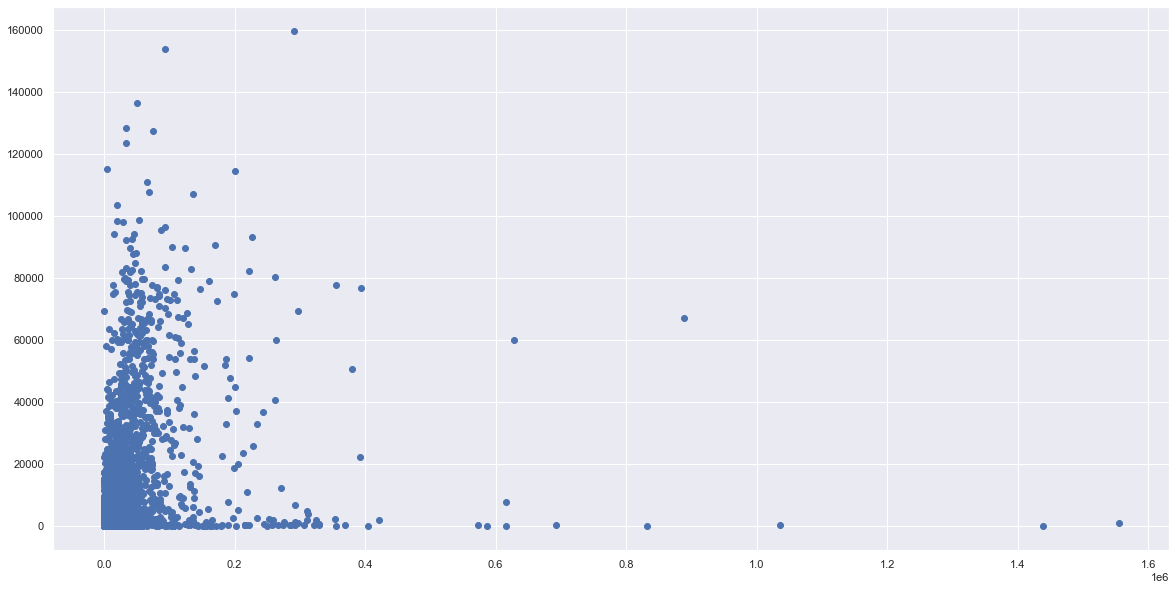

In [68]:
plt.scatter(test[test[net_amount_col]>0][net_amount_col], test[test[net_amount_col]>0]['pred'])

In [69]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test[net_amount_col], test['pred']))

42391.80934567742

In [70]:
np.sqrt(mean_squared_error(test[test[net_amount_col]>0][net_amount_col], test[test[net_amount_col]>0]['pred']))

48275.53052588032

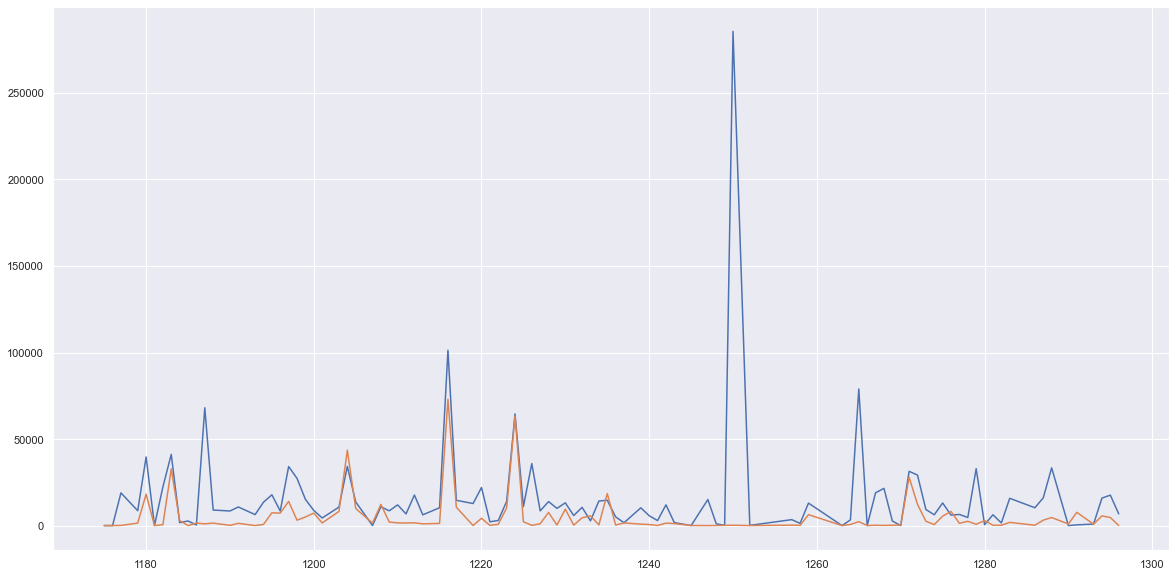

In [71]:
tem = test[test[net_amount_col]>0][900:1000]
plt.plot(tem[net_amount_col])
plt.plot(tem['pred'])

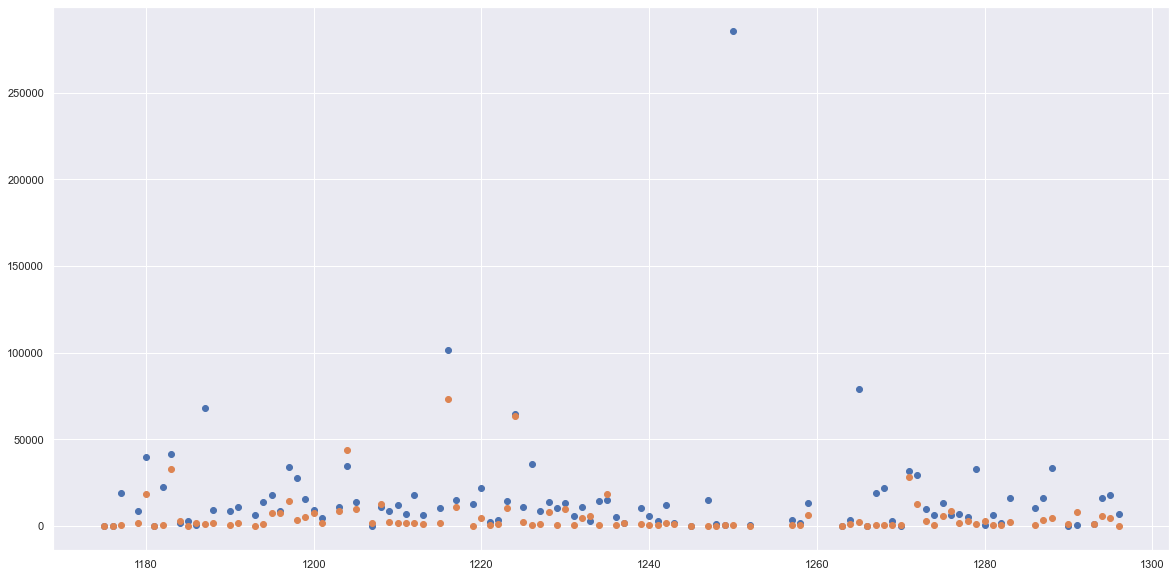

In [72]:
plt.scatter(tem.index, tem[net_amount_col])
plt.scatter(tem.index, tem['pred'])

In [73]:
test['error'] = test[net_amount_col] - test['pred']
test[[net_amount_col,'pred','error']].describe()

,CONVERTED_ORDER_CURRENCY,pred,error
count,9.490000e+03,9490.000000,9.490000e+03
mean,1.497601e+04,4918.189307,1.005782e+04
std,4.299925e+04,12204.532910,4.118355e+04
min,-5.820766e-11,-0.545820,-1.103107e+05
25%,7.275958e-12,79.069732,-7.700262e+01
50%,4.518394e+03,676.548340,1.310017e+03
75%,1.624260e+04,3755.559698,1.073685e+04
max,1.555085e+06,159497.325000,1.554398e+06


In [74]:
b = [[0, 500, 0, 0], [500, 1000, 0, 0],[1000, 5000, 0, 0],[5000, 10000, 0, 0],  [10000, 50000,0, 0],[50000,100000, 0, 0],[100000, 1000000, 0, 0], [1000000, np.inf, 0, 0]]
for t in test['error']:
    for l in b:
        if (t>l[0]) & (t<l[1]): l[2]+=1
        elif (t<-l[0]) & (t>-l[1]): l[3]+=1
pd.DataFrame(b, columns = ['low','high','plus', 'neg'])

,low,high,plus,neg
0,0,500.0,318,2551
1,500,1000.0,249,301
2,1000,5000.0,1305,718
3,5000,10000.0,1077,201
4,10000,50000.0,2168,243
5,50000,100000.0,198,19
6,100000,1000000.0,138,1
7,1000000,inf,3,0


In [75]:
b = [[0, 500, 0], [500, 1000, 0],[1000, 5000, 0],[5000, 10000, 0], [10000, 100000, 0], [100000, 1000000, 0], [1000000, np.inf, 0]]
for t in test['error']:
    for l in b:
        if (t>l[0]) & (t<l[1]): l[2]+=1

pd.DataFrame(b, columns = ['low','high','count'])

,low,high,count
0,0,500.0,318
1,500,1000.0,249
2,1000,5000.0,1305
3,5000,10000.0,1077
4,10000,100000.0,2366
5,100000,1000000.0,138
6,1000000,inf,3


In [76]:
test[[net_amount_col,'pred','error']].sort_values(by = 'error')

,CONVERTED_ORDER_CURRENCY,pred,error
8804,4.872073e+03,115182.781817,-1.103107e+05
7504,3.407368e+04,128267.322250,-9.419364e+04
9488,3.281064e+04,123525.895534,-9.071526e+04
8817,5.040194e+04,136407.311759,-8.600537e+04
8650,1.943133e+04,103437.933156,-8.400660e+04
...,...,...,...
8611,8.883347e+05,67148.423677,8.211863e+05
1923,8.312983e+05,6.879592,8.312914e+05
7512,1.035354e+06,196.106142,1.035158e+06
2858,1.438272e+06,13.241214,1.438258e+06
